<a href="https://colab.research.google.com/github/saiki-69420/object-detection/blob/main/yolo_new_2_5k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!unzip /content/gdrive/MyDrive/data2/small2.zip > /dev/null

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5
!pip install -r /content/yolov5/requirements.txt

In [ ]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

In [ ]:
!python /content/yolov5/train.py --img 640 --batch 64 --epochs 100 --data /content/yolov5/dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.7.13 torch-1.11.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv

In [ ]:
from google.colab import files
!zip -r /content/result_2.5k.zip /content/yolov5/runs/train/exp4

In [ ]:
files.download('/content/result_2.5k.zip')

In [ ]:
im1 = Image.open('/content/small2/images/test/004e9e21cd1aca568a8ffc77a54638ce.jpg')
im2 = Image.open('/content/small2/images/test/00a8764cff12b2e849c850f4be5608bc.jpg')

model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp4/weights/best.pt')

result1 = model(im1,size=640)
result2 = model(im2,size=640)

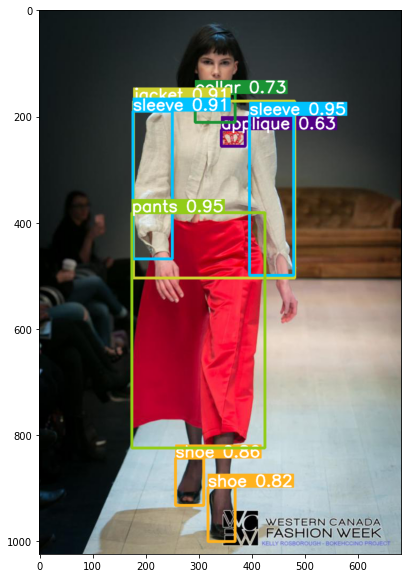

In [ ]:
%matplotlib inline
plt.figure(figsize = (10,10))
plt.imshow(np.squeeze(result1.render()))
plt.show()

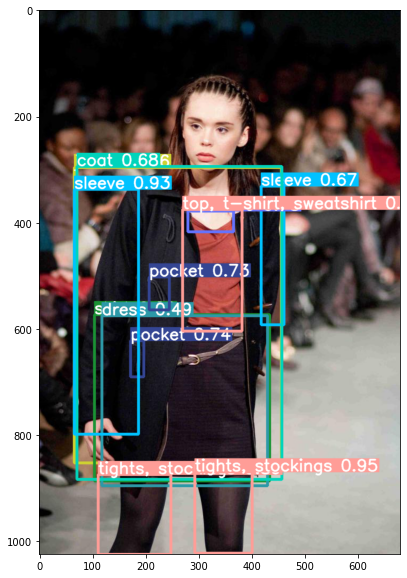

In [ ]:
%matplotlib inline
plt.figure(figsize = (10,10))
plt.imshow(np.squeeze(result2.render()))
plt.show()